# Máster en Big Data y Data Science

# Metodologías de gestión y diseño de proyectos de big data

## Actividad Guiada III - Aplicando CRISP-DM en un entorno ágil

---

### Sprint 2 - Modelado + Evaluación + Despliegue

### Carga de librerías base

In [1]:
import pandas as pd
import numpy as np

from google.colab import files

### Lectura del dataset generado en la fase de "Preparación de los datos"

In [2]:
files.upload()

datos = pd.read_csv('datos_completos_filtrado.csv', index_col='Unnamed: 0')
print(datos.columns)
datos.head()

Saving datos_completos_filtrado.csv to datos_completos_filtrado (3).csv
Index(['sexo', 'nacionalidad', 'edad', 'regular', 'cnt_readmisiones',
       'calidad', 'inactividad', 'estado_civil', 'sit_lab_alumno',
       'tipo_res_alumno', 'sit_lab_padres', 'estudios_padres'],
      dtype='object')


,sexo,nacionalidad,edad,regular,cnt_readmisiones,calidad,inactividad,estado_civil,sit_lab_alumno,tipo_res_alumno,sit_lab_padres,estudios_padres
0,2,1.0,33,S,1.0,A,1,1.0,NC,-1.0,-1,-1.0
1,2,1.0,35,N,2.0,A,6,1.0,NC,-1.0,-1,-1.0
2,1,1.0,35,N,2.0,P,1,1.0,N,1.0,3,3.0
3,2,1.0,34,N,2.0,A,1,3.0,NC,-1.0,-1,-1.0
4,2,1.0,38,S,1.0,A,1,1.0,NC,-1.0,-1,-1.0


### Separación del atributo de clase y las columnas a utilizar del dataset

In [3]:
labels = datos.calidad.values

features = datos[['sexo', 'nacionalidad', 'edad', 'regular', 
                 'cnt_readmisiones', 'inactividad', 'estado_civil', 
                 'sit_lab_alumno', 'tipo_res_alumno', 'sit_lab_padres', 'estudios_padres']]

In [4]:
print(f"Vista de los datos del atributo target: \n{labels}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['A' 'A' 'P' ... 'P' 'A' 'P']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,sexo,nacionalidad,edad,regular,cnt_readmisiones,inactividad,estado_civil,sit_lab_alumno,tipo_res_alumno,sit_lab_padres,estudios_padres
0,2,1.0,33,S,1.0,1,1.0,NC,-1.0,-1,-1.0
1,2,1.0,35,N,2.0,6,1.0,NC,-1.0,-1,-1.0
2,1,1.0,35,N,2.0,1,1.0,N,1.0,3,3.0
3,2,1.0,34,N,2.0,1,3.0,NC,-1.0,-1,-1.0
4,2,1.0,38,S,1.0,1,1.0,NC,-1.0,-1,-1.0


### Ajustes de valores para un mejor rendimiento de las técnicas de aprendizaje automático

#### Antes de pasar a valores binarizados se puede hacer un mapeo para tener valores más representativos


In [5]:

# Columna: sexo
cambios_sexo = {
    2 : 'F', 
    1 : 'M'
}

sexoN = features.loc[:, ('sexo')].map(cambios_sexo).rename('sexoN')

# Columna: nacionalidad
cambios_nacionalidad = {
    1 : 'AR',
    2 : 'PY',
    3 : 'BR',
    4 : 'OT',
    -1 : 'NC'
} #OT : Otros países

nacionalidadN = features.loc[:, ('nacionalidad')].map(cambios_nacionalidad).rename('nacionalidadN')

# Columna: estado_civil
cambios_est_civil = {
    1 : 'S',
    2 : 'P',
    3 : 'C',
    4 : 'D',
    5 : 'V',
    6 : 'NC'
}

est_civilN = features.loc[:, ('estado_civil')].map(cambios_est_civil).rename('est_civilN')

# Columna: tipo_res_alumno
cambios_tipo_res_alumno = {
    1 : 'CP',
    2 : 'VA',
    3 : 'VP',
    4 : 'RU',
    -1 : 'NC'
}

tipo_res_alumnoN = features.loc[:, ('tipo_res_alumno')].map(cambios_tipo_res_alumno).rename('tipo_res_alumnoN')

# Columna: sit_lab_padres
cambios_sit_lab_padres = {
    1 : 'D',
    2 : 'BT',
    3 : 'TI',
    4 : 'TF',
    5 : 'J',
    -1 : 'NC'
}

sit_lab_padresN = features.loc[:, ('sit_lab_padres')].map(cambios_sit_lab_padres).rename('sit_lab_padresN')

# Columna: estudios_padres
cambios_estudios_padres = {
    1 : 'SE',
    2 : 'PI',
    3 : 'PC',
    4 : 'SI',
    5 : 'SC',
    6 : 'UI',
    7 : 'UC',
    -1 : 'NC'
}

estudios_padresN = features.loc[:, ('estudios_padres')].map(cambios_estudios_padres).rename('estudios_padresN')

atributos_nuevos = pd.concat([estudios_padresN, sit_lab_padresN , tipo_res_alumnoN, est_civilN, nacionalidadN, sexoN], axis=1)
atributos_nuevos.head()

,estudios_padresN,sit_lab_padresN,tipo_res_alumnoN,est_civilN,nacionalidadN,sexoN
0,NC,NC,NC,S,AR,F
1,NC,NC,NC,S,AR,F
2,PC,TI,CP,S,AR,M
3,NC,NC,NC,C,AR,F
4,NC,NC,NC,S,AR,F


In [6]:
atributos_numericos = features.loc[:, ('edad', 'regular', 'inactividad', 'cnt_readmisiones', 'sit_lab_alumno')]
atributos_numericos.head()

,edad,regular,inactividad,cnt_readmisiones,sit_lab_alumno
0,33,S,1,1.0,NC
1,35,N,6,2.0,NC
2,35,N,1,2.0,N
3,34,N,1,2.0,NC
4,38,S,1,1.0,NC


In [7]:
datos_procesados = pd.concat([atributos_numericos, atributos_nuevos], axis=1)
datos_procesados.head()

,edad,regular,inactividad,cnt_readmisiones,sit_lab_alumno,estudios_padresN,sit_lab_padresN,tipo_res_alumnoN,est_civilN,nacionalidadN,sexoN
0,33,S,1,1.0,NC,NC,NC,NC,S,AR,F
1,35,N,6,2.0,NC,NC,NC,NC,S,AR,F
2,35,N,1,2.0,N,PC,TI,CP,S,AR,M
3,34,N,1,2.0,NC,NC,NC,NC,C,AR,F
4,38,S,1,1.0,NC,NC,NC,NC,S,AR,F


#### Se pasa a binarizar los atributos.

In [8]:
data = pd.get_dummies(datos_procesados)
data.head()

,edad,inactividad,cnt_readmisiones,regular_N,regular_S,sit_lab_alumno_N,sit_lab_alumno_NC,sit_lab_alumno_S,estudios_padresN_NC,estudios_padresN_PC,estudios_padresN_PI,estudios_padresN_SC,estudios_padresN_SE,estudios_padresN_SI,estudios_padresN_UC,estudios_padresN_UI,sit_lab_padresN_BT,sit_lab_padresN_D,sit_lab_padresN_J,sit_lab_padresN_NC,sit_lab_padresN_TF,sit_lab_padresN_TI,tipo_res_alumnoN_CP,tipo_res_alumnoN_NC,tipo_res_alumnoN_RU,tipo_res_alumnoN_VA,tipo_res_alumnoN_VP,est_civilN_C,est_civilN_D,est_civilN_NC,est_civilN_P,est_civilN_S,est_civilN_V,nacionalidadN_AR,nacionalidadN_BR,nacionalidadN_NC,nacionalidadN_OT,nacionalidadN_PY,sexoN_F,sexoN_M
0,33,1,1.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,35,6,2.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,35,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,34,1,2.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4,38,1,1.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [9]:
# Se verifica la presencia de valores nulos
np.isnan(data).any()

#data.info()

edad                   False
inactividad            False
cnt_readmisiones       False
regular_N              False
regular_S              False
sit_lab_alumno_N       False
sit_lab_alumno_NC      False
sit_lab_alumno_S       False
estudios_padresN_NC    False
estudios_padresN_PC    False
estudios_padresN_PI    False
estudios_padresN_SC    False
estudios_padresN_SE    False
estudios_padresN_SI    False
estudios_padresN_UC    False
estudios_padresN_UI    False
sit_lab_padresN_BT     False
sit_lab_padresN_D      False
sit_lab_padresN_J      False
sit_lab_padresN_NC     False
sit_lab_padresN_TF     False
sit_lab_padresN_TI     False
tipo_res_alumnoN_CP    False
tipo_res_alumnoN_NC    False
tipo_res_alumnoN_RU    False
tipo_res_alumnoN_VA    False
tipo_res_alumnoN_VP    False
est_civilN_C           False
est_civilN_D           False
est_civilN_NC          False
est_civilN_P           False
est_civilN_S           False
est_civilN_V           False
nacionalidadN_AR       False
nacionalidadN_

### Generación de los datasets de entrenamiento y testing

In [10]:
from sklearn.model_selection import train_test_split

# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 42) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)
# Se podría modificar con el parámetro test_size = 0.## y el complemento para training

In [11]:
# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}")

Un registro de entrenamiento: 
edad                   32.0
inactividad             0.0
cnt_readmisiones        1.0
regular_N               1.0
regular_S               0.0
sit_lab_alumno_N        0.0
sit_lab_alumno_NC       1.0
sit_lab_alumno_S        0.0
estudios_padresN_NC     0.0
estudios_padresN_PC     0.0
estudios_padresN_PI     0.0
estudios_padresN_SC     1.0
estudios_padresN_SE     0.0
estudios_padresN_SI     0.0
estudios_padresN_UC     0.0
estudios_padresN_UI     0.0
sit_lab_padresN_BT      0.0
sit_lab_padresN_D       0.0
sit_lab_padresN_J       0.0
sit_lab_padresN_NC      0.0
sit_lab_padresN_TF      0.0
sit_lab_padresN_TI      1.0
tipo_res_alumnoN_CP     0.0
tipo_res_alumnoN_NC     1.0
tipo_res_alumnoN_RU     0.0
tipo_res_alumnoN_VA     0.0
tipo_res_alumnoN_VP     0.0
est_civilN_C            0.0
est_civilN_D            0.0
est_civilN_NC           0.0
est_civilN_P            0.0
est_civilN_S            1.0
est_civilN_V            0.0
nacionalidadN_AR        1.0
nacionalidadN_BR 

In [12]:
# Vista de los datos de testeo para una fila

print(f"Un registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de testeo: 
edad                   32.0
inactividad             1.0
cnt_readmisiones        0.0
regular_N               0.0
regular_S               1.0
sit_lab_alumno_N        0.0
sit_lab_alumno_NC       1.0
sit_lab_alumno_S        0.0
estudios_padresN_NC     0.0
estudios_padresN_PC     0.0
estudios_padresN_PI     0.0
estudios_padresN_SC     0.0
estudios_padresN_SE     1.0
estudios_padresN_SI     0.0
estudios_padresN_UC     0.0
estudios_padresN_UI     0.0
sit_lab_padresN_BT      0.0
sit_lab_padresN_D       0.0
sit_lab_padresN_J       0.0
sit_lab_padresN_NC      1.0
sit_lab_padresN_TF      0.0
sit_lab_padresN_TI      0.0
tipo_res_alumnoN_CP     0.0
tipo_res_alumnoN_NC     1.0
tipo_res_alumnoN_RU     0.0
tipo_res_alumnoN_VA     0.0
tipo_res_alumnoN_VP     0.0
est_civilN_C            0.0
est_civilN_D            0.0
est_civilN_NC           0.0
est_civilN_P            0.0
est_civilN_S            1.0
est_civilN_V            0.0
nacionalidadN_AR        1.0
nacionalidadN_BR        

### Aplicación de técnicas para extracción de patrones

In [13]:
#Importaciones varias para la evaluación

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix

# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cf = plot_confusion_matrix(modelo,test_data,test_labels,cmap='Blues_r',values_format='d')

#### ZeroR

In [14]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data, train_labels)

prediction = clf.predict(test_data)
print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.5779334500875657
Vista de una muestra de valores de predicción y datos de testeo:
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'A' 'A' 'P' 'P' 'P' 'P' 'P' 'A' 'A']


#### Regresión Logística

In [15]:
from sklearn.linear_model import LogisticRegression

# Prueba 1
#lreg = LogisticRegression(solver = 'liblinear') #solver = 'liblinear'
# Prueba 2
#lreg = LogisticRegression(solver = 'newton-cg') #solver = 'newton-cg'
# Prueba 3
lreg = LogisticRegression(solver = 'liblinear', penalty='l1', intercept_scaling=2) #solver = 'liblinear'


lreg.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=2, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Rendimiento obtenido: 0.6444833625218914
Reporte de indicadores:
               precision    recall  f1-score   support

           A       0.67      0.76      0.71       330
           P       0.60      0.49      0.54       241

    accuracy                           0.64       571
   macro avg       0.63      0.62      0.62       571
weighted avg       0.64      0.64      0.64       571

Matriz de confusión:


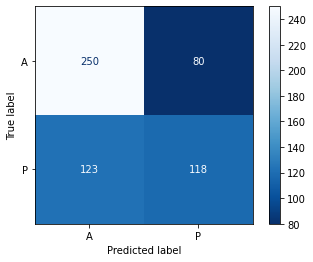

In [16]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'ball_tree') 

knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Rendimiento obtenido: 0.6287215411558669
Reporte de indicadores:
               precision    recall  f1-score   support

           A       0.63      0.85      0.73       330
           P       0.61      0.32      0.42       241

    accuracy                           0.63       571
   macro avg       0.62      0.59      0.58       571
weighted avg       0.62      0.63      0.60       571

Matriz de confusión:


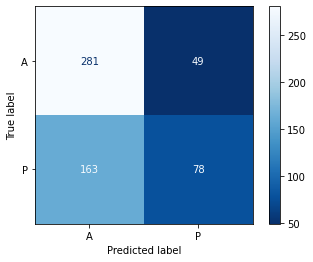

In [18]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles (TDIDT)

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Prueba 1
#dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_split=10)

# Prueba 2
dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=5)

# Prueba 3
#dtc = DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_split=5, min_samples_leaf=3)

dtc.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Rendimiento obtenido: 0.6462346760070052
Reporte de indicadores:
               precision    recall  f1-score   support

           A       0.69      0.70      0.70       330
           P       0.58      0.57      0.58       241

    accuracy                           0.65       571
   macro avg       0.64      0.64      0.64       571
weighted avg       0.65      0.65      0.65       571

Matriz de confusión:


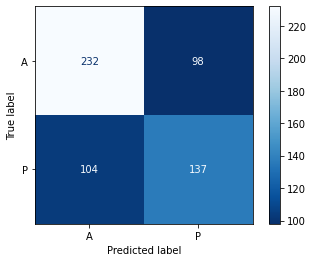

In [38]:
evaluar_modelo(dtc, test_data, test_labels)

In [21]:
from IPython.display import SVG
from sklearn.tree import export_graphviz  
from graphviz import Source 
# Se requiere tener la librería graphviz instalada a nivel del kernel que usa la libreta  
# Puede hacerse con: pip install graphviz | pip3 install graphviz | conda install -c anaconda graphviz 

# Linux: sudo apt install graphviz

graph = Source(export_graphviz(dtc, out_file=None, feature_names=data.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

### Métodos de ensamblado de modelos: RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Prueba 1
#rndf = RandomForestClassifier(n_estimators=10)

# Prueba 2
rndf = RandomForestClassifier(n_estimators=15)

rndf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Rendimiento obtenido: 0.6077057793345009
Reporte de indicadores:
               precision    recall  f1-score   support

           A       0.65      0.68      0.67       330
           P       0.54      0.51      0.52       241

    accuracy                           0.61       571
   macro avg       0.60      0.59      0.59       571
weighted avg       0.60      0.61      0.61       571

Matriz de confusión:


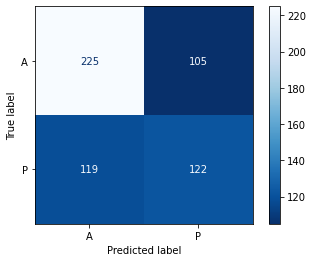

In [23]:
evaluar_modelo(rndf, test_data, test_labels)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Prueba 1
#gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0)

# Prueba 2
#gbc = GradientBoostingClassifier(n_estimators=180, learning_rate=0.5,
#    max_depth=1, random_state=0)

# Prueba 3
gbc = GradientBoostingClassifier(n_estimators=180, learning_rate=0.5,
    max_depth=2, random_state=0)

gbc.fit(train_data, train_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Rendimiento obtenido: 0.6217162872154116
Reporte de indicadores:
               precision    recall  f1-score   support

           A       0.66      0.72      0.69       330
           P       0.56      0.49      0.52       241

    accuracy                           0.62       571
   macro avg       0.61      0.60      0.60       571
weighted avg       0.62      0.62      0.62       571

Matriz de confusión:


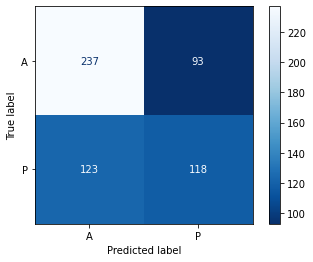

In [25]:
evaluar_modelo(gbc, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Implementar clasificación con otras técnicas

### Prueba de despliegue (aplicación sobre los datos nuevos)

In [26]:
files.upload()

datosNuevos = pd.read_csv('datos_nuevos.csv', index_col='Unnamed: 0')
datosNuevos.head()

Saving datos_nuevos.csv to datos_nuevos (1).csv


,edad,nacionalidad,sexo,cnt_readmisiones,estado_civil,tipo_res_alumno,sit_lab_alumno,sit_lab_padres,estudios_padres,regular,inactividad
0,40,1.0,1,0,3.0,3.0,S,2,5.0,S,22
1,31,1.0,2,0,3.0,3.0,S,2,3.0,S,13
2,31,1.0,2,0,4.0,3.0,S,-1,1.0,S,13
3,25,1.0,1,0,3.0,3.0,S,4,7.0,S,7
4,20,1.0,1,0,3.0,3.0,N,2,3.0,S,2


#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [27]:
# Columna: sexo
cambios_sexo = {
    2 : 'F', 
    1 : 'M'
}

sexoN = datosNuevos.loc[:, ('sexo')].map(cambios_sexo).rename('sexoN')

# Columna: nacionalidad
cambios_nacionalidad = {
    1 : 'AR',
    2 : 'PY',
    3 : 'BR',
    4 : 'OT',
    -1 : 'NC'
}

nacionalidadN = datosNuevos.loc[:, ('nacionalidad')].map(cambios_nacionalidad).rename('nacionalidadN')

# Columna: estado_civil
cambios_est_civil = {
    1 : 'S',
    2 : 'P',
    3 : 'C',
    4 : 'D',
    5 : 'V',
    6 : 'NC'
}

est_civilN = datosNuevos.loc[:, ('estado_civil')].map(cambios_est_civil).rename('est_civilN')

# Columna: tipo_res_alumno
cambios_tipo_res_alumno = {
    1 : 'CP',
    2 : 'VA',
    3 : 'VP',
    4 : 'RU',
    -1 : 'NC'
}

tipo_res_alumnoN = datosNuevos.loc[:, ('tipo_res_alumno')].map(cambios_tipo_res_alumno).rename('tipo_res_alumnoN')

# Columna: sit_lab_padres
cambios_sit_lab_padres = {
    1 : 'D',
    2 : 'BT',
    3 : 'TI',
    4 : 'TF',
    5 : 'J',
    -1 : 'NC'
}

sit_lab_padresN = datosNuevos.loc[:, ('sit_lab_padres')].map(cambios_sit_lab_padres).rename('sit_lab_padresN')

# Columna: estudios_padres
cambios_estudios_padres = {
    1 : 'SE',
    2 : 'PI',
    3 : 'PC',
    4 : 'SI',
    5 : 'SC',
    6 : 'UI',
    7 : 'UC',
    -1 : 'NC'
}

estudios_padresN = datosNuevos.loc[:, ('estudios_padres')].map(cambios_estudios_padres).rename('estudios_padresN')

atributos_nuevos21 = pd.concat([estudios_padresN, sit_lab_padresN , tipo_res_alumnoN, est_civilN, nacionalidadN, sexoN], axis=1)
#atributos_nuevos.head()

atributos_numericos21 = datosNuevos.loc[:, ('edad', 'regular', 'inactividad', 'cnt_readmisiones', 'sit_lab_alumno')]
#atributos_numericos.head()

datosNuevos_procesados = pd.concat([atributos_numericos21, atributos_nuevos21], axis=1)
datosNuevos_procesados.head()

,edad,regular,inactividad,cnt_readmisiones,sit_lab_alumno,estudios_padresN,sit_lab_padresN,tipo_res_alumnoN,est_civilN,nacionalidadN,sexoN
0,40,S,22,0,S,SC,BT,VP,C,AR,M
1,31,S,13,0,S,PC,BT,VP,C,AR,F
2,31,S,13,0,S,SE,NC,VP,D,AR,F
3,25,S,7,0,S,UC,TF,VP,C,AR,M
4,20,S,2,0,N,PC,BT,VP,C,AR,M


#### Se obtienen los valores binarizados

In [28]:
# Se obtienen las transformaciones de valores correspondientes
datosNuevos_codif = pd.get_dummies(datosNuevos_procesados)

### Ajuste de columnas para coincidir con el dataset de entrenamiento

In [29]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(datosNuevos_codif.columns)
columnas_faltantes
for columna in columnas_faltantes:
    datosNuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(datosNuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(datosNuevos_codif.columns))

Datos nuevos: 40
Datos entrenamiento: 40
set()


In [30]:
# Finalmente, se tiene que adaptar el orden de las columnas 

datosNuevos_codif = datosNuevos_codif[data.columns]
datosNuevos_codif.columns

Index(['edad', 'inactividad', 'cnt_readmisiones', 'regular_N', 'regular_S',
       'sit_lab_alumno_N', 'sit_lab_alumno_NC', 'sit_lab_alumno_S',
       'estudios_padresN_NC', 'estudios_padresN_PC', 'estudios_padresN_PI',
       'estudios_padresN_SC', 'estudios_padresN_SE', 'estudios_padresN_SI',
       'estudios_padresN_UC', 'estudios_padresN_UI', 'sit_lab_padresN_BT',
       'sit_lab_padresN_D', 'sit_lab_padresN_J', 'sit_lab_padresN_NC',
       'sit_lab_padresN_TF', 'sit_lab_padresN_TI', 'tipo_res_alumnoN_CP',
       'tipo_res_alumnoN_NC', 'tipo_res_alumnoN_RU', 'tipo_res_alumnoN_VA',
       'tipo_res_alumnoN_VP', 'est_civilN_C', 'est_civilN_D', 'est_civilN_NC',
       'est_civilN_P', 'est_civilN_S', 'est_civilN_V', 'nacionalidadN_AR',
       'nacionalidadN_BR', 'nacionalidadN_NC', 'nacionalidadN_OT',
       'nacionalidadN_PY', 'sexoN_F', 'sexoN_M'],
      dtype='object')

### Predicción de valores en el dataset nuevo (2020-2021)

In [31]:
# Se obtienen los valores para el dataset de predicción

nuevos = datosNuevos_codif.values
nuevos

array([[40, 22,  0, ...,  0,  0,  1],
       [31, 13,  0, ...,  0,  1,  0],
       [31, 13,  0, ...,  0,  1,  0],
       ...,
       [18,  0,  1, ...,  0,  1,  0],
       [18,  0,  0, ...,  0,  1,  0],
       [18,  0,  0, ...,  0,  0,  1]])

In [39]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = dtc.predict(nuevos)

# Probar con los demás métodos

In [40]:
# Se convierten de array a dataframe para ser agregados como columna nueva en el dataset
prediccionDF = pd.DataFrame(prediccion_nuevos)

In [41]:
# Se agrega la nueva columna
datosNuevos['calidad'] = prediccionDF

In [42]:
datosNuevos.head()

,edad,nacionalidad,sexo,cnt_readmisiones,estado_civil,tipo_res_alumno,sit_lab_alumno,sit_lab_padres,estudios_padres,regular,inactividad,calidad
0,40,1.0,1,0,3.0,3.0,S,2,5.0,S,22,A
1,31,1.0,2,0,3.0,3.0,S,2,3.0,S,13,A
2,31,1.0,2,0,4.0,3.0,S,-1,1.0,S,13,A
3,25,1.0,1,0,3.0,3.0,S,4,7.0,S,7,A
4,20,1.0,1,0,3.0,3.0,N,2,3.0,S,2,P


In [43]:
# Se obtiene el conteo de valores para actualizar el documento del informe con la predicción realizada
pd.value_counts(datosNuevos.calidad)

P    19
A    16
Name: calidad, dtype: int64